In [157]:
# Import libraries

import pandas as pd
import numpy as np
from pandas.io.html import read_html

In [158]:
# Get the neighborhoods names from Wikipedia

page = 'https://en.wikipedia.org/wiki/Special_wards_of_Tokyo'

In [159]:
# Read HTML from Wikipedia

wikitables = read_html(page)

In [160]:
# Select the correct table

wikitables[3].head()

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


In [161]:
# Create DataFrame from the web scraping

df = wikitables[3]
type(df)

pandas.core.frame.DataFrame

In [162]:
df.head()

,No.,Flag,Name,Kanji,Population(as of October 2016,Density(/km2),Area(km2),Major districts
0,01,NaN,Chiyoda,千代田区,59441,5100,11.66,"Nagatachō, Kasumigaseki, Ōtemachi, Marunouchi,..."
1,02,NaN,Chūō,中央区,147620,14460,10.21,"Nihonbashi, Kayabachō, Ginza, Tsukiji, Hatchōb..."
2,03,NaN,Minato,港区,248071,12180,20.37,"Odaiba, Shinbashi, Hamamatsuchō, Mita, Roppong..."
3,04,NaN,Shinjuku,新宿区,339211,18620,18.22,"Shinjuku, Takadanobaba, Ōkubo, Kagurazaka, Ich..."
4,05,NaN,Bunkyō,文京区,223389,19790,11.29,"Hongō, Yayoi, Hakusan"


In [163]:
# Drop useless columns

df = df.drop(['No.', 'Flag', 'Kanji', 'Major districts'], axis = 1)
df.head()

,Name,Population(as of October 2016,Density(/km2),Area(km2)
0,Chiyoda,59441,5100,11.66
1,Chūō,147620,14460,10.21
2,Minato,248071,12180,20.37
3,Shinjuku,339211,18620,18.22
4,Bunkyō,223389,19790,11.29


In [164]:
# Rename columns

column_names = ['Neighborhood', 'Population', 'Density', 'Area']
df.columns = column_names
df.head()

,Neighborhood,Population,Density,Area
0,Chiyoda,59441,5100,11.66
1,Chūō,147620,14460,10.21
2,Minato,248071,12180,20.37
3,Shinjuku,339211,18620,18.22
4,Bunkyō,223389,19790,11.29


In [165]:
# Import libraries for latitude and longitude

from geopy.geocoders import Nominatim 

In [166]:
# Add latitude and logitude columns

df['Latitude'] = df.apply(lambda _: '', axis=1)
df['Longitude'] = df.apply(lambda _: '', axis=1)

df.head()

,Neighborhood,Population,Density,Area,Latitude,Longitude
0,Chiyoda,59441,5100,11.66,,
1,Chūō,147620,14460,10.21,,
2,Minato,248071,12180,20.37,,
3,Shinjuku,339211,18620,18.22,,
4,Bunkyō,223389,19790,11.29,,


In [167]:
for neigh, i in zip(df['Neighborhood'], range(0,len(df['Neighborhood']))):
    
    address = neigh
    geolocator = Nominatim(user_agent="tokyo_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    #print('The geograpical coordinate for {} are {}, {}.'.format(neigh, latitude, longitude))
    df['Latitude'][i] = latitude
    df['Longitude'][i] = longitude

C:\Users\eloym\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\eloym\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [178]:
df.head

<bound method NDFrame.head of    Neighborhood  Population  Density    Area Latitude Longitude
0       Chiyoda       59441     5100   11.66  35.6938   139.753
1          Chūō      147620    14460   10.21  35.6663   139.776
2        Minato      248071    12180   20.37  35.6432    139.74
3      Shinjuku      339211    18620   18.22  35.6938   139.704
4        Bunkyō      223389    19790   11.29  35.7188   139.745
5         Taitō      200486    19830   10.11  35.7174   139.791
6        Sumida      260358    18910   13.77  35.7004   139.805
7          Kōtō      502579    12510   40.16  35.6492   139.813
8     Shinagawa      392492    17180   22.84  35.5993   139.739
9        Meguro      280283    19110   14.67  35.6213   139.688
10          Ōta      722608    11910   60.66  35.5612   139.716
11     Setagaya      910868    15690   58.05  35.6461   139.656
12      Shibuya      227850    15080   15.11  35.6646   139.699
13       Nakano      332902    21350   15.59  35.7181   139.664
14     Sug

In [180]:
# Delete last row

df = df.drop(df.index[len(df)-1])
df

,Neighborhood,Population,Density,Area,Latitude,Longitude
0,Chiyoda,59441,5100,11.66,35.6938,139.753
1,Chūō,147620,14460,10.21,35.6663,139.776
2,Minato,248071,12180,20.37,35.6432,139.74
3,Shinjuku,339211,18620,18.22,35.6938,139.704
4,Bunkyō,223389,19790,11.29,35.7188,139.745
5,Taitō,200486,19830,10.11,35.7174,139.791
6,Sumida,260358,18910,13.77,35.7004,139.805
7,Kōtō,502579,12510,40.16,35.6492,139.813
8,Shinagawa,392492,17180,22.84,35.5993,139.739
9,Meguro,280283,19110,14.67,35.6213,139.688


In [181]:
# Correct coordinates of Kita

address = 'Kita Tokyo'
geolocator = Nominatim(user_agent="tokyo_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate for {} are {}, {}.'.format(neigh, latitude, longitude))
df['Latitude'][16] = latitude
df['Longitude'][16] = longitude


The geograpical coordinate for Overall are 35.6777691, 139.7646365.


C:\Users\eloym\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\eloym\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [182]:
df

,Neighborhood,Population,Density,Area,Latitude,Longitude
0,Chiyoda,59441,5100,11.66,35.6938,139.753
1,Chūō,147620,14460,10.21,35.6663,139.776
2,Minato,248071,12180,20.37,35.6432,139.74
3,Shinjuku,339211,18620,18.22,35.6938,139.704
4,Bunkyō,223389,19790,11.29,35.7188,139.745
5,Taitō,200486,19830,10.11,35.7174,139.791
6,Sumida,260358,18910,13.77,35.7004,139.805
7,Kōtō,502579,12510,40.16,35.6492,139.813
8,Shinagawa,392492,17180,22.84,35.5993,139.739
9,Meguro,280283,19110,14.67,35.6213,139.688


In [191]:
# Install and import map rendering library

import folium
!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda

In [194]:
# Obtain coordenates of Tokyo

address = 'Tokyo'
geolocator = Nominatim(user_agent="tokyo_explorer")
location = geolocator.geocode(address)
latitude_tokyo = location.latitude
longitude_tokyo = location.longitude
print('The geograpical coordinate for {} are {}, {}.'.format(neigh, latitude_tokyo, longitude_tokyo))

The geograpical coordinate for Overall are 35.6828387, 139.7594549.


In [205]:
# Create map of Tokyo

tokyo_map = folium.Map(location=[latitude_tokyo, longitude_tokyo], zoom_start=10)

In [208]:
# Add markers to map
for lat, lng, label in zip(df['Latitude'], df['Longitude'], df['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(tokyo_map)  
    
tokyo_map

In [210]:
# Define Foursquare credentials and version

CLIENT_ID = 'XMJ5KLHJSMBK4DCPY2SWGI5ADWJRLRKPXDFF3TYJKZO5A2DR'
CLIENT_SECRET = 'Y4IWWHSW2Z3K4GFN1QF5VYUVRW5T30LB1TXBICG5ANPMYOGO' 
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: XMJ5KLHJSMBK4DCPY2SWGI5ADWJRLRKPXDFF3TYJKZO5A2DR
CLIENT_SECRET:Y4IWWHSW2Z3K4GFN1QF5VYUVRW5T30LB1TXBICG5ANPMYOGO


In [214]:
# Define function to get nearby venues for a neighborhood

LIMIT = 50

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [232]:
# Get nearby venues 

tokyo_venues = getNearbyVenues(names=neighborhoods['Neighborhood'],
                                   latitudes=neighborhoods['Latitude'],
                                   longitudes=neighborhoods['Longitude']
                                  )

tokyo_venues.head()

Chiyoda
Chūō
Minato
Shinjuku
Bunkyō
Taitō
Sumida
Kōtō
Shinagawa
Meguro
Ōta
Setagaya
Shibuya
Nakano
Suginami
Toshima
Kita
Arakawa
Itabashi
Nerima
Adachi
Katsushika
Edogawa


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
1,Chiyoda,35.69381,139.753216,Shimizumon Gate (清水門),35.692685,139.752681,Historic Site
2,Chiyoda,35.69381,139.753216,Kitanomaru Park (北の丸公園),35.691653,139.751201,Park
3,Chiyoda,35.69381,139.753216,Nippon Budokan (日本武道館),35.693356,139.749865,Stadium
4,Chiyoda,35.69381,139.753216,Mori no Butchers (森のブッチャーズ),35.694770,139.755980,Gastropub


In [233]:
# Analyze categories of venues

venues = pd.DataFrame(tokyo_venues['Venue Category'].value_counts())
venues

,Venue Category
Convenience Store,68
Café,40
Chinese Restaurant,39
Ramen Restaurant,38
Japanese Restaurant,36
...,...
Theater,1
Breakfast Spot,1
Diner,1
Bus Station,1


In [238]:
# Select only restaurants

tokyo_restaurants = tokyo_venues[tokyo_venues['Venue Category'].str.contains("Restaurant")]
tokyo_restaurants.head()


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Chiyoda,35.69381,139.753216,Jimbocho Kurosu (神保町 黒須),35.695539,139.754851,Ramen Restaurant
5,Chiyoda,35.69381,139.753216,Kanda Tendonya (神田天丼家),35.695765,139.754682,Tempura Restaurant
7,Chiyoda,35.69381,139.753216,Bondy (欧風カレー ボンディ),35.695544,139.757356,Japanese Curry Restaurant
11,Chiyoda,35.69381,139.753216,Genrai Shuka (源来酒家),35.695671,139.754409,Chinese Restaurant
12,Chiyoda,35.69381,139.753216,咸亨酒店,35.696010,139.756730,Chinese Restaurant


In [243]:
# Analyze categories of restaurants

restaurants_categories = pd.DataFrame(tokyo_restaurants['Venue Category'].value_counts())
restaurants_categories = restaurants_categories.reset_index()
restaurants_categories.head()

,index,Venue Category
0,Chinese Restaurant,39
1,Ramen Restaurant,38
2,Japanese Restaurant,36
3,Sushi Restaurant,27
4,Italian Restaurant,13


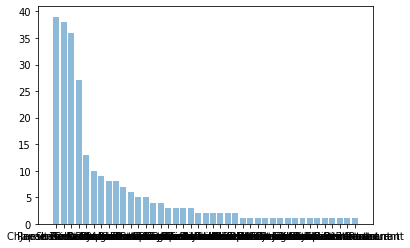

In [244]:
# Visulize restaurants

plt.bar(restaurants_categories['index'], restaurants_categories['Venue Category'], align='center', alpha=0.5)
plt.show()

In [246]:
# Number of restaurants categories per neighborhood

print('There are {} categories in Toyko.'.format(len(tokyo_restaurants['Venue Category'].unique())))

There are 41 categories in Toyko.


In [270]:
# One Hot encoding analysis
tokyo_onehot = pd.get_dummies(tokyo_restaurants[['Venue Category']], prefix="", prefix_sep="")

tokyo_onehot['Neighborhood'] = tokyo_restaurants['Neighborhood'] 

tokyo_onehot = tokyo_onehot.set_index('Neighborhood')

tokyo_onehot = tokyo_onehot.reset_index()

tokyo_onehot.head()

,Neighborhood,American Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,Chiyoda,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Chiyoda,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Chiyoda,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
# Group rows by neighborhood

tokyo_grouped = tokyo_onehot.groupby('Neighborhood').mean().reset_index()
tokyo_grouped.head()

,Neighborhood,American Restaurant,Asian Restaurant,Brazilian Restaurant,Chinese Restaurant,Donburi Restaurant,Dongbei Restaurant,Dumpling Restaurant,Fast Food Restaurant,French Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Tempura Restaurant,Thai Restaurant,Tonkatsu Restaurant,Udon Restaurant,Unagi Restaurant,Vietnamese Restaurant,Yakitori Restaurant,Yoshoku Restaurant
0,Adachi,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
1,Arakawa,0.0,0.0,0.0,0.300000,0.100000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
2,Bunkyō,0.0,0.0,0.0,0.333333,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.333333,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000
3,Chiyoda,0.0,0.0,0.0,0.304348,0.000000,0.0,0.0,0.0,0.0,...,0.086957,0.000000,0.043478,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.043478
4,Chūō,0.0,0.0,0.0,0.000000,0.026316,0.0,0.0,0.0,0.0,...,0.421053,0.000000,0.026316,0.0,0.026316,0.0,0.052632,0.0,0.026316,0.000000


In [280]:
# Creating a function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [281]:
#Creating dataframe with top 10 restaurants based on occurance and cuisine for each neighborhood

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = tokyo_grouped['Neighborhood']


for ind in np.arange(tokyo_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(tokyo_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adachi,Japanese Restaurant,Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant
1,Arakawa,Chinese Restaurant,Indian Restaurant,Ramen Restaurant,Donburi Restaurant,Japanese Restaurant,Italian Restaurant,Yoshoku Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
2,Bunkyō,Chinese Restaurant,Ramen Restaurant,Szechuan Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
3,Chiyoda,Chinese Restaurant,Ramen Restaurant,Japanese Curry Restaurant,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Yoshoku Restaurant,Tempura Restaurant,Restaurant,Hotpot Restaurant
4,Chūō,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Unagi Restaurant,Soba Restaurant,Tonkatsu Restaurant,Yakitori Restaurant,Tempura Restaurant,Donburi Restaurant,Spanish Restaurant


In [288]:
# Import libraries for clustering

from sklearn.cluster import KMeans

In [304]:
# Set k (number of clusters)

k = 4

In [305]:
#Drop Neighborhood column

tokyo_grouped_clustering = tokyo_grouped.drop('Neighborhood', 1)

In [306]:
# K-means clustering and generate cluster labels

kmeans = KMeans(n_clusters=k, random_state=0).fit(tokyo_grouped_clustering)

kmeans.labels_[0:20]

array([3, 1, 1, 1, 0, 1, 2, 1, 0, 3, 0, 0, 1, 2, 1, 1, 0, 0, 1, 1])

In [311]:
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
neighborhoods_venues_sorted

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,3,Adachi,Japanese Restaurant,Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant
1,1,Arakawa,Chinese Restaurant,Indian Restaurant,Ramen Restaurant,Donburi Restaurant,Japanese Restaurant,Italian Restaurant,Yoshoku Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant
2,1,Bunkyō,Chinese Restaurant,Ramen Restaurant,Szechuan Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
3,1,Chiyoda,Chinese Restaurant,Ramen Restaurant,Japanese Curry Restaurant,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Yoshoku Restaurant,Tempura Restaurant,Restaurant,Hotpot Restaurant
4,0,Chūō,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Unagi Restaurant,Soba Restaurant,Tonkatsu Restaurant,Yakitori Restaurant,Tempura Restaurant,Donburi Restaurant,Spanish Restaurant
5,1,Edogawa,Ramen Restaurant,Italian Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Indian Restaurant
6,2,Itabashi,Chinese Restaurant,Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant
7,1,Katsushika,Chinese Restaurant,Donburi Restaurant,Korean Restaurant,Dumpling Restaurant,Ramen Restaurant,Yoshoku Restaurant,Indian Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant
8,0,Kita,Japanese Restaurant,Chinese Restaurant,French Restaurant,Sushi Restaurant,Ramen Restaurant,Yoshoku Restaurant,Japanese Curry Restaurant,Mexican Restaurant,Okonomiyaki Restaurant,American Restaurant
9,3,Kōtō,Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant


In [314]:
# Merge data

tokyo_clusters= neighborhoods_venues_sorted.join(df.set_index('Neighborhood'), on='Neighborhood')

tokyo_clusters.head() # check the last columns!

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Population,Density,Area,Latitude,Longitude
0,3,Adachi,Japanese Restaurant,Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Curry Restaurant,Italian Restaurant,Indian Restaurant,674067,12660,53.25,35.7837,139.795
1,1,Arakawa,Chinese Restaurant,Indian Restaurant,Ramen Restaurant,Donburi Restaurant,Japanese Restaurant,Italian Restaurant,Yoshoku Restaurant,Korean Restaurant,Kebab Restaurant,Kaiseki Restaurant,213648,21030,10.16,35.7375,139.781
2,1,Bunkyō,Chinese Restaurant,Ramen Restaurant,Szechuan Restaurant,Yoshoku Restaurant,Hotpot Restaurant,Kebab Restaurant,Kaiseki Restaurant,Japanese Restaurant,Japanese Curry Restaurant,Italian Restaurant,223389,19790,11.29,35.7188,139.745
3,1,Chiyoda,Chinese Restaurant,Ramen Restaurant,Japanese Curry Restaurant,Italian Restaurant,Sushi Restaurant,Indian Restaurant,Yoshoku Restaurant,Tempura Restaurant,Restaurant,Hotpot Restaurant,59441,5100,11.66,35.6938,139.753
4,0,Chūō,Sushi Restaurant,Japanese Restaurant,Italian Restaurant,Unagi Restaurant,Soba Restaurant,Tonkatsu Restaurant,Yakitori Restaurant,Tempura Restaurant,Donburi Restaurant,Spanish Restaurant,147620,14460,10.21,35.6663,139.776


In [318]:
# Map the neighborhoods with the clusters


map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

colors = ['black', 'orange', 'darkred', 'gray', 'green']

for lat, lon, poi, cluster in zip(tokyo_clusters['Latitude'], tokyo_clusters['Longitude'], tokyo_clusters['Neighborhood'], tokyo_clusters['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=colors[int(cluster)],
        fill=True,
        fill_color=colors[int(cluster)],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters